# Digit Classification Tutorial
Neural Netorks using Tensorflow 2.0  
Patrick Old

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Create Validation Dataset

In [3]:
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train = x_train[10000:]
y_train = y_train[10000:]

### Show Image

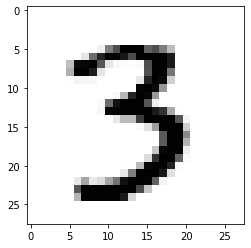

In [4]:
image_index = 0 # You may select anything up to 60,000
#print(img_names[y_train[image_index][0]]) # Print the label
plt.imshow(x_train[image_index], cmap='Greys') # Show the image

### Data Cleansing
Scaling all values to be between 0-1 for gradient descent to work properly

In [5]:
x_val = (x_val.astype('float32') / 255.0)
x_train = (x_train.astype('float32') / 255.0)
x_test = (x_test.astype('float32') / 255.0)

In [6]:
x_train.shape

(50000, 28, 28)

### Create Neural Network
Create an arbitrary sequential neural network

In [7]:
model = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='tanh'),
    Dense(200, activation='tanh'),
    Dense(200, activation='tanh'),
    Dense(200, activation='tanh'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='softmax') # Use softmax for output for classification of > 2 items
])

### View the Neural Network

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               4

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7142 - accuracy: 0.7770 - val_loss: 0.2561 - val_accuracy: 0.9237
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1983 - accuracy: 0.9418 - val_loss: 0.1663 - val_accuracy: 0.9520
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1322 - accuracy: 0.9611 - val_loss: 0.1455 - val_accuracy: 0.9586
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0981 - accuracy: 0.9703 - val_loss: 0.1749 - val_accuracy: 0.9488
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0758 - accuracy: 0.9767 - val_loss: 0.1147 - val_accuracy: 0.9671
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0589 - accuracy: 0.9830 - val_loss: 0.1022 - val_accuracy: 0.9716
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0450 - accuracy: 0.9869 - val_loss: 0.1083 - val_accuracy:

### Check Model Accuracy
97.85% accuracy is achieved on the test dataset. Not bad with so little code.

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9743


[0.10412710905075073, 0.9743000268936157]

### Show Images and Predictions

Below the 10 images for the test class are shown, along with their predictions in the following cell.

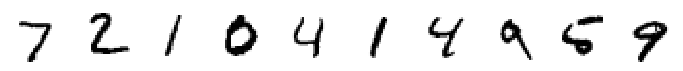

In [12]:
n_rows = 1
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
model.predict_classes(x_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9])